In [1]:
import seaborn as sn
%matplotlib inline
sn.set_style('darkgrid')

In [2]:
tips = sn.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Distplot

G:\Anaconda 2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

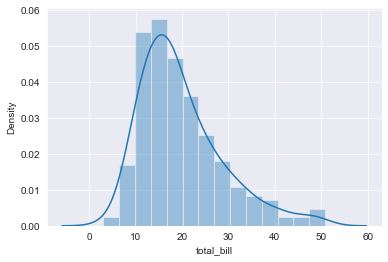

In [4]:
sn.distplot(tips['total_bill'])

**Removing Line**

G:\Anaconda 2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

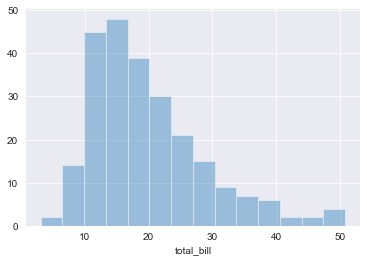

In [5]:
sn.distplot(tips['total_bill'], kde = False) #KDE removes line

**Change the Width of bars**

<AxesSubplot:xlabel='total_bill'>

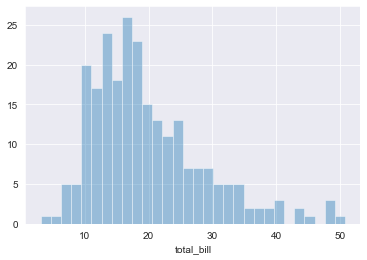

In [6]:
sn.distplot(tips['total_bill'], kde = False, bins = 30)

## Join Plot

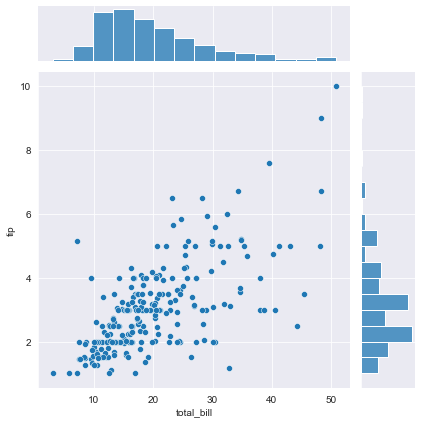

In [7]:
sn.jointplot(x = 'total_bill', y = 'tip', data = tips)

**Change the style and color of scatter**

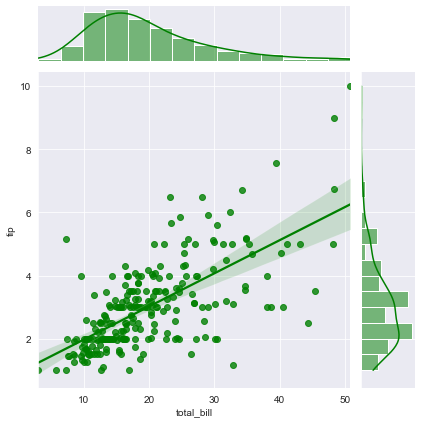

In [8]:
sn.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg', color = 'green') # kinds: hex, reg, 
                                                                    # scatter(default), kde 

## Pair Plot

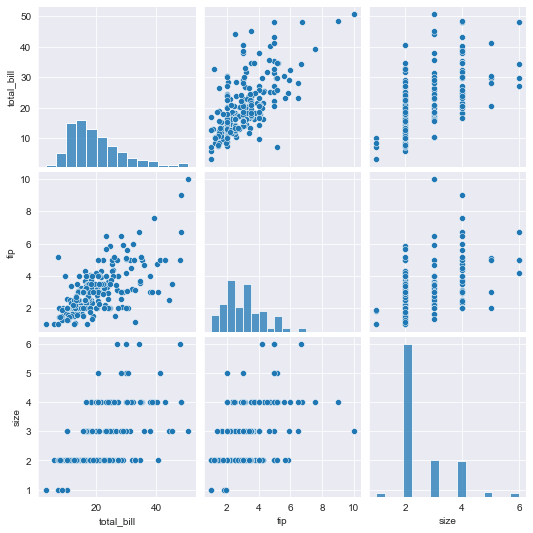

In [9]:
sn.pairplot(tips)

**Add categorical column**

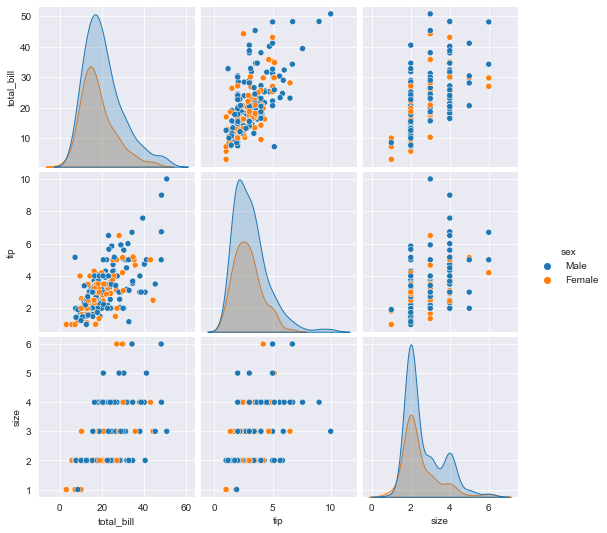

In [10]:
sn.pairplot(tips, hue = 'sex')

**Change Clor Automatically**

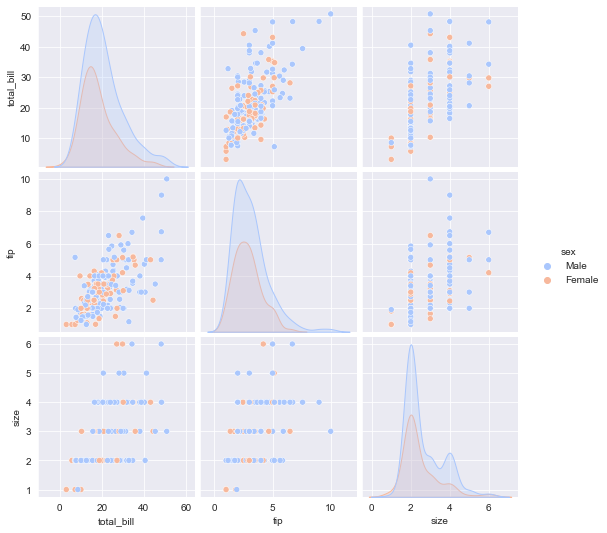

In [11]:
sn.pairplot(tips, hue = 'sex', palette = 'coolwarm')

## Rugplot

<AxesSubplot:xlabel='total_bill'>

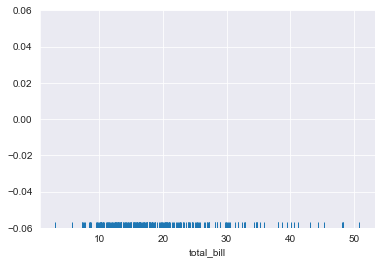

In [12]:
sn.rugplot(tips['total_bill'])

## KDE Plot

(0.0, 1.0)

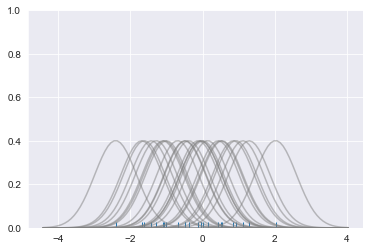

In [13]:
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sn.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 1.0, 'Sum of the Basis Function')

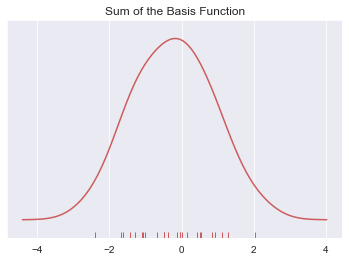

In [14]:
# To get kde plot we can sum these basis functions.

# plot thye sum of the basis function
sum_of_kde = np.sum(kernel_list, axis = 0)

# Plot figure
fig = plt.plot(x_axis, sum_of_kde, color = 'indianred')

# Add the initial rugplot
sn.rugplot(dataset, c = 'indianred')

# Get rid of y-tick Marks
plt.yticks([])

# Set title
plt.title('Sum of the Basis Function')